In [ ]:
'''
 * Copyright (c) 2016 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Multivariate Taylor Series and Outer Products

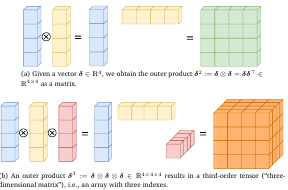

Fig.13 Visualizing outer products. Outer products of vectors increase the dimensionality of the array by 1 per term. (a) The outer product of two vectors results in a matrix; (b) the outer product of three vectors yields a third-order tensor.

### Fig.13: Visualizing Outer Products

Outer products of vectors increase the dimensionality of the array by 1 per term.

### Part (a): Second-Order Outer Product

Given a vector $\delta \in \mathbb{R}^4$, we obtain the outer product:

$$\delta^2 := \delta \otimes \delta = \delta\delta^{\top} \in \mathbb{R}^{4 \times 4}$$

This results in a **matrix** (second-order tensor).

**Example:**
If $\delta = \begin{bmatrix} \delta_1 \\ \delta_2 \\ \delta_3 \\ \delta_4 \end{bmatrix}$, then:

$$\delta^2 = \delta\delta^{\top} = \begin{bmatrix} 
\delta_1 \\ \delta_2 \\ \delta_3 \\ \delta_4 
\end{bmatrix} 
\begin{bmatrix} 
\delta_1 & \delta_2 & \delta_3 & \delta_4 
\end{bmatrix} = 
\begin{bmatrix}
\delta_1^2 & \delta_1\delta_2 & \delta_1\delta_3 & \delta_1\delta_4 \\
\delta_2\delta_1 & \delta_2^2 & \delta_2\delta_3 & \delta_2\delta_4 \\
\delta_3\delta_1 & \delta_3\delta_2 & \delta_3^2 & \delta_3\delta_4 \\
\delta_4\delta_1 & \delta_4\delta_2 & \delta_4\delta_3 & \delta_4^2
\end{bmatrix}$$

### Part (b): Third-Order Outer Product

An outer product $\delta^3 := \delta \otimes \delta \otimes \delta \in \mathbb{R}^{4 \times 4 \times 4}$ results in a **third-order tensor** (three-dimensional array with three indices).

The element at position $(i,j,k)$ is: $\delta^3[i,j,k] = \delta[i] \cdot \delta[j] \cdot \delta[k]$

---

## Definition 5.7: Multivariate Taylor Series

Consider a function:
$$f : \mathbb{R}^D \to \mathbb{R}$$
$$x \mapsto f(x), \quad x \in \mathbb{R}^D$$

that is smooth at $x_0$. When we define the difference vector $\delta := x - x_0$, the **multivariate Taylor series** of $f$ at $x_0$ is defined as:

$$f(x) = \sum_{k=0}^{\infty} \frac{D_x^k f(x_0)}{k!} \delta^k \tag{5.151}$$

where $D_x^k f(x_0)$ is the $k$-th (total) derivative of $f$ with respect to $x$, evaluated at $x_0$.

---

## Definition 5.8: Taylor Polynomial

The **Taylor polynomial** of degree $n$ of $f$ at $x_0$ contains the first $n+1$ components of the series in (5.151) and is defined as:

$$T_n(x) = \sum_{k=0}^{n} \frac{D_x^k f(x_0)}{k!} \delta^k \tag{5.152}$$

---

## Important Notes on Tensor Notation

In equations (5.151) and (5.152), we use the notation $\delta^k$, which requires clarification:

1. **For vectors** $x \in \mathbb{R}^D$ where $D > 1$ and $k > 1$, $\delta^k$ is not standard vector multiplication
2. Both $D_x^k f$ and $\delta^k$ are **$k$-th order tensors** (k-dimensional arrays)
3. The $k$-th order tensor $\delta^k \in \mathbb{R}^{\underbrace{D \times D \times \ldots \times D}_{k \text{ times}}}$ is obtained as a **$k$-fold outer product** $\otimes$ of the vector $\delta \in \mathbb{R}^D$

### Example: Second-Order Case

$$\delta^2 := \delta \otimes \delta = \delta\delta^{\top}$$

The element-wise representation is:
$$\delta^2[i,j] = \delta[i]\delta[j] \tag{5.153}$$

### Tensor Implementation Notes

- A **vector** can be implemented as a one-dimensional array
- A **matrix** can be implemented as a two-dimensional array  
- Higher-order tensors require multi-dimensional arrays with appropriate indexing

---

## Summary

The multivariate Taylor series extends the familiar single-variable Taylor series to functions of multiple variables by:

1. Using **difference vectors** $\delta = x - x_0$
2. Employing **outer products** to create higher-order tensors $\delta^k$
3. Matching the tensor structure of derivatives $D_x^k f(x_0)$ with the tensor powers $\delta^k$

This framework provides a systematic way to approximate multivariate functions using polynomial expansions around a point $x_0$.

In [1]:
import numpy as np
from itertools import product
import math

class MultivariateTools:
    """
    Core Python implementation of multivariate Taylor series and outer products.
    Based on Figure 5.13: Visualizing outer products and Definition 5.7-5.8.
    """
    
    @staticmethod
    def outer_product_kth_order(delta, k):
        """
        Compute k-th order outer product δ^k = δ ⊗ δ ⊗ ... ⊗ δ (k times)
        
        Args:
            delta: numpy array of shape (D,) - the difference vector
            k: int - order of the outer product
            
        Returns:
            numpy array of shape (D, D, ..., D) with k dimensions
        """
        if k == 0:
            return 1.0  # scalar
        elif k == 1:
            return delta.copy()
        
        # Initialize with first outer product
        result = np.outer(delta, delta)  # δ ⊗ δ
        
        # Iteratively compute higher-order outer products
        for _ in range(k - 2):
            result = np.tensordot(result, delta, axes=0)
            
        return result
    
    @staticmethod
    def outer_product_element_wise(delta, k, indices):
        """
        Compute element δ^k[i1, i2, ..., ik] = δ[i1] * δ[i2] * ... * δ[ik]
        
        Args:
            delta: numpy array - the difference vector
            k: int - order of the outer product
            indices: tuple - indices (i1, i2, ..., ik)
            
        Returns:
            float - the element value
        """
        if k == 0:
            return 1.0
        
        result = 1.0
        for idx in indices:
            result *= delta[idx]
        return result

class PartialDerivativeComputer:
    """
    Compute partial derivatives numerically for Taylor series.
    """
    
    def __init__(self, func, h=1e-6):
        """
        Args:
            func: callable - function f: R^D -> R
            h: float - step size for finite differences
        """
        self.func = func
        self.h = h
    
    def gradient(self, x):
        """Compute first-order partial derivatives (gradient)"""
        x = np.array(x)
        D = len(x)
        grad = np.zeros(D)
        
        for i in range(D):
            x_plus = x.copy()
            x_minus = x.copy()
            x_plus[i] += self.h
            x_minus[i] -= self.h
            
            grad[i] = (self.func(x_plus) - self.func(x_minus)) / (2 * self.h)
            
        return grad
    
    def hessian(self, x):
        """Compute second-order partial derivatives (Hessian matrix)"""
        x = np.array(x)
        D = len(x)
        hess = np.zeros((D, D))
        
        for i in range(D):
            for j in range(D):
                if i == j:
                    # Second derivative ∂²f/∂x_i²
                    x_plus = x.copy()
                    x_minus = x.copy()
                    x_plus[i] += self.h
                    x_minus[i] -= self.h
                    
                    hess[i, j] = (self.func(x_plus) - 2*self.func(x) + self.func(x_minus)) / (self.h**2)
                else:
                    # Mixed derivative ∂²f/∂x_i∂x_j
                    x_pp = x.copy()
                    x_pm = x.copy()
                    x_mp = x.copy()
                    x_mm = x.copy()
                    
                    x_pp[i] += self.h; x_pp[j] += self.h
                    x_pm[i] += self.h; x_pm[j] -= self.h
                    x_mp[i] -= self.h; x_mp[j] += self.h
                    x_mm[i] -= self.h; x_mm[j] -= self.h
                    
                    hess[i, j] = (self.func(x_pp) - self.func(x_pm) - 
                                 self.func(x_mp) + self.func(x_mm)) / (4 * self.h**2)
        
        return hess
    
    def third_order_derivatives(self, x):
        """Compute third-order partial derivatives (simplified version)"""
        x = np.array(x)
        D = len(x)
        # For simplicity, only compute diagonal third derivatives
        third_derivs = np.zeros((D, D, D))
        
        for i in range(D):
            x_2h = x.copy()
            x_h = x.copy()
            x_minus_h = x.copy()
            x_minus_2h = x.copy()
            
            x_2h[i] += 2*self.h
            x_h[i] += self.h
            x_minus_h[i] -= self.h
            x_minus_2h[i] -= 2*self.h
            
            # Third derivative using finite differences
            third_derivs[i, i, i] = (self.func(x_2h) - 2*self.func(x_h) + 
                                   2*self.func(x_minus_h) - self.func(x_minus_2h)) / (2 * self.h**3)
        
        return third_derivs

class MultivariateTaylorSeries:
    """
    Implementation of multivariate Taylor series expansion.
    Based on Definition 5.7 and 5.8.
    """
    
    def __init__(self, func, x0, max_order=3):
        """
        Args:
            func: callable - function f: R^D -> R
            x0: array-like - expansion point
            max_order: int - maximum order for Taylor polynomial
        """
        self.func = func
        self.x0 = np.array(x0)
        self.D = len(self.x0)
        self.max_order = max_order
        
        # Compute derivatives at x0
        self.derivative_computer = PartialDerivativeComputer(func)
        self.derivatives = self._compute_derivatives()
        
    def _compute_derivatives(self):
        """Precompute derivatives up to max_order at x0"""
        derivs = {}
        
        # 0th order: function value
        derivs[0] = self.func(self.x0)
        
        # 1st order: gradient
        if self.max_order >= 1:
            derivs[1] = self.derivative_computer.gradient(self.x0)
        
        # 2nd order: Hessian
        if self.max_order >= 2:
            derivs[2] = self.derivative_computer.hessian(self.x0)
        
        # 3rd order: simplified third derivatives
        if self.max_order >= 3:
            derivs[3] = self.derivative_computer.third_order_derivatives(self.x0)
            
        return derivs
    
    def taylor_polynomial(self, x, n=None):
        """
        Compute Taylor polynomial T_n(x) of degree n.
        
        Args:
            x: array-like - evaluation point
            n: int - degree of polynomial (default: max_order)
            
        Returns:
            float - T_n(x)
        """
        if n is None:
            n = self.max_order
            
        x = np.array(x)
        delta = x - self.x0  # difference vector
        
        result = 0.0
        
        for k in range(min(n + 1, len(self.derivatives))):
            if k == 0:
                # 0th order term: f(x0)
                term = self.derivatives[0]
            elif k == 1:
                # 1st order term: ∇f(x0) · δ
                term = np.dot(self.derivatives[1], delta)
            elif k == 2:
                # 2nd order term: (1/2!) δᵀ H δ
                term = 0.5 * np.dot(delta, np.dot(self.derivatives[2], delta))
            elif k == 3:
                # 3rd order term (simplified): sum over diagonal elements
                term = 0.0
                for i in range(self.D):
                    term += self.derivatives[3][i, i, i] * (delta[i]**3)
                term /= math.factorial(3)
            
            result += term
            
        return result
    
    def taylor_series_term(self, x, k):
        """
        Compute the k-th term of Taylor series: (D^k f(x0) / k!) * δ^k
        
        Args:
            x: array-like - evaluation point
            k: int - order of the term
            
        Returns:
            float - k-th term value
        """
        x = np.array(x)
        delta = x - self.x0
        
        if k == 0:
            return self.derivatives[0]
        elif k == 1:
            return np.dot(self.derivatives[1], delta)
        elif k == 2:
            return 0.5 * np.dot(delta, np.dot(self.derivatives[2], delta))
        elif k == 3:
            # Simplified 3rd order
            term = 0.0
            for i in range(self.D):
                term += self.derivatives[3][i, i, i] * (delta[i]**3)
            return term / math.factorial(3)
        else:
            raise NotImplementedError(f"Order {k} not implemented")

# Example functions for demonstration
def quadratic_2d(x):
    """Example: f(x1, x2) = x1² + 2*x1*x2 + 3*x2²"""
    return x[0]**2 + 2*x[0]*x[1] + 3*x[1]**2

def rosenbrock_2d(x):
    """Rosenbrock function: f(x1, x2) = (1-x1)² + 100*(x2-x1²)²"""
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

def exponential_3d(x):
    """Example: f(x1, x2, x3) = exp(x1 + x2 + x3)"""
    return np.exp(x[0] + x[1] + x[2])

# Demonstration and testing
if __name__ == "__main__":
    print("=== Multivariate Taylor Series Implementation ===\n")
    
    # Example 1: Outer products
    print("1. Outer Products Demonstration:")
    delta = np.array([1, 2, 3, 4])
    print(f"δ = {delta}")
    
    # 2nd order outer product: δ ⊗ δ
    delta_2 = MultivariateTools.outer_product_kth_order(delta, 2)
    print(f"\nδ² = δ ⊗ δ (shape {delta_2.shape}):")
    print(delta_2)
    
    # Verify element-wise computation
    print(f"\nVerification: δ²[1,2] = δ[1]*δ[2] = {delta[1]}*{delta[2]} = {delta[1]*delta[2]}")
    print(f"From tensor: δ²[1,2] = {delta_2[1,2]}")
    
    # 3rd order outer product: δ ⊗ δ ⊗ δ
    delta_3 = MultivariateTools.outer_product_kth_order(delta, 3)
    print(f"\nδ³ = δ ⊗ δ ⊗ δ (shape {delta_3.shape}):")
    print(f"δ³[1,2,3] = {delta_3[1,2,3]} (should be {delta[1]*delta[2]*delta[3]})")
    
    print("\n" + "="*60 + "\n")
    
    # Example 2: Taylor series for quadratic function
    print("2. Taylor Series for Quadratic Function:")
    x0 = np.array([1.0, 1.0])
    taylor_quad = MultivariateTaylorSeries(quadratic_2d, x0, max_order=3)
    
    test_points = [
        np.array([1.1, 1.1]),
        np.array([1.5, 0.5]),
        np.array([2.0, 2.0])
    ]
    
    for x_test in test_points:
        exact = quadratic_2d(x_test)
        taylor_0 = taylor_quad.taylor_polynomial(x_test, n=0)
        taylor_1 = taylor_quad.taylor_polynomial(x_test, n=1)
        taylor_2 = taylor_quad.taylor_polynomial(x_test, n=2)
        
        print(f"\nPoint x = {x_test}:")
        print(f"  Exact f(x) = {exact:.6f}")
        print(f"  T₀(x) = {taylor_0:.6f}, Error = {abs(exact - taylor_0):.6f}")
        print(f"  T₁(x) = {taylor_1:.6f}, Error = {abs(exact - taylor_1):.6f}")
        print(f"  T₂(x) = {taylor_2:.6f}, Error = {abs(exact - taylor_2):.6f}")
    
    print("\n" + "="*60 + "\n")
    
    # Example 3: Taylor series for Rosenbrock function
    print("3. Taylor Series for Rosenbrock Function:")
    x0 = np.array([1.0, 1.0])  # Global minimum
    taylor_rosen = MultivariateTaylorSeries(rosenbrock_2d, x0, max_order=3)
    
    x_test = np.array([1.1, 1.1])
    exact = rosenbrock_2d(x_test)
    
    print(f"At x₀ = {x0} (global minimum):")
    print(f"f(x₀) = {rosenbrock_2d(x0)}")
    print(f"∇f(x₀) = {taylor_rosen.derivatives[1]}")
    
    print(f"\nAt test point x = {x_test}:")
    print(f"Exact f(x) = {exact:.6f}")
    for n in range(4):
        taylor_n = taylor_rosen.taylor_polynomial(x_test, n=n)
        error = abs(exact - taylor_n)
        print(f"T_{n}(x) = {taylor_n:.6f}, Error = {error:.6f}")
    
    print("\n" + "="*60 + "\n")
    
    # Example 4: 3D function
    print("4. Taylor Series for 3D Exponential Function:")
    x0 = np.array([0.0, 0.0, 0.0])
    taylor_exp = MultivariateTaylorSeries(exponential_3d, x0, max_order=3)
    
    x_test = np.array([0.1, 0.1, 0.1])
    exact = exponential_3d(x_test)
    
    print(f"f(x₁,x₂,x₃) = exp(x₁ + x₂ + x₃)")
    print(f"Expansion around x₀ = {x0}")
    print(f"Test point x = {x_test}")
    print(f"Exact f(x) = {exact:.6f}")
    
    for n in range(4):
        taylor_n = taylor_exp.taylor_polynomial(x_test, n=n)
        error = abs(exact - taylor_n)
        print(f"T_{n}(x) = {taylor_n:.6f}, Error = {error:.6f}")

=== Multivariate Taylor Series Implementation ===

1. Outer Products Demonstration:
δ = [1 2 3 4]

δ² = δ ⊗ δ (shape (4, 4)):
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]
 [ 4  8 12 16]]

Verification: δ²[1,2] = δ[1]*δ[2] = 2*3 = 6
From tensor: δ²[1,2] = 6

δ³ = δ ⊗ δ ⊗ δ (shape (4, 4, 4)):
δ³[1,2,3] = 24 (should be 24)


2. Taylor Series for Quadratic Function:

Point x = [1.1 1.1]:
  Exact f(x) = 7.260000
  T₀(x) = 6.000000, Error = 1.260000
  T₁(x) = 7.200000, Error = 0.060000
  T₂(x) = 7.259992, Error = 0.000008

Point x = [1.5 0.5]:
  Exact f(x) = 4.500000
  T₀(x) = 6.000000, Error = 1.500000
  T₁(x) = 4.000000, Error = 0.500000
  T₂(x) = 4.499711, Error = 0.000289

Point x = [2. 2.]:
  Exact f(x) = 24.000000
  T₀(x) = 6.000000, Error = 18.000000
  T₁(x) = 18.000000, Error = 6.000000
  T₂(x) = 23.999201, Error = 0.000799


3. Taylor Series for Rosenbrock Function:
At x₀ = [1. 1.] (global minimum):
f(x₀) = 0.0
∇f(x₀) = [ 3.99968836e-10 -1.11022243e-14]

At test point x = [1.1 1.1]:

In [2]:
import math
from itertools import product

class Vector:
    """Pure Python vector implementation"""
    
    def __init__(self, data):
        if isinstance(data, (list, tuple)):
            self.data = list(data)
        else:
            self.data = [data]
        self.dim = len(self.data)
    
    def __getitem__(self, index):
        return self.data[index]
    
    def __setitem__(self, index, value):
        self.data[index] = value
    
    def __len__(self):
        return self.dim
    
    def __str__(self):
        return f"Vector({self.data})"
    
    def __repr__(self):
        return self.__str__()
    
    def copy(self):
        return Vector(self.data[:])
    
    def dot(self, other):
        """Dot product with another vector"""
        if len(self) != len(other):
            raise ValueError("Vectors must have same dimension")
        return sum(self[i] * other[i] for i in range(len(self)))
    
    def __add__(self, other):
        """Vector addition"""
        if isinstance(other, Vector):
            return Vector([self[i] + other[i] for i in range(len(self))])
        else:  # scalar
            return Vector([self[i] + other for i in range(len(self))])
    
    def __sub__(self, other):
        """Vector subtraction"""
        if isinstance(other, Vector):
            return Vector([self[i] - other[i] for i in range(len(self))])
        else:  # scalar
            return Vector([self[i] - other for i in range(len(self))])
    
    def __mul__(self, scalar):
        """Scalar multiplication"""
        return Vector([self[i] * scalar for i in range(len(self))])
    
    def __rmul__(self, scalar):
        return self.__mul__(scalar)

class Matrix:
    """Pure Python matrix implementation"""
    
    def __init__(self, rows, cols=None, data=None):
        if data is not None:
            self.data = data
            self.rows = len(data)
            self.cols = len(data[0]) if data else 0
        else:
            self.rows = rows
            self.cols = cols if cols is not None else rows
            self.data = [[0.0 for _ in range(self.cols)] for _ in range(self.rows)]
    
    def __getitem__(self, index):
        if isinstance(index, tuple):
            i, j = index
            return self.data[i][j]
        else:
            return self.data[index]
    
    def __setitem__(self, index, value):
        if isinstance(index, tuple):
            i, j = index
            self.data[i][j] = value
        else:
            self.data[index] = value
    
    def __str__(self):
        result = "Matrix([\n"
        for row in self.data:
            result += "  " + str(row) + "\n"
        result += "])"
        return result
    
    def mv_multiply(self, vector):
        """Matrix-vector multiplication"""
        if self.cols != len(vector):
            raise ValueError("Matrix columns must match vector dimension")
        
        result = Vector([0.0] * self.rows)
        for i in range(self.rows):
            for j in range(self.cols):
                result[i] += self[i, j] * vector[j]
        return result
    
    def quadratic_form(self, vector):
        """Compute v^T * M * v"""
        mv = self.mv_multiply(vector)
        return vector.dot(mv)

class Tensor:
    """Pure Python tensor implementation for arbitrary dimensions"""
    
    def __init__(self, shape, data=None):
        self.shape = tuple(shape)
        self.ndim = len(shape)
        self.size = 1
        for s in shape:
            self.size *= s
        
        if data is not None:
            self.data = data
        else:
            self.data = self._create_nested_list(shape)
    
    def _create_nested_list(self, shape):
        """Create nested list structure for tensor"""
        if len(shape) == 1:
            return [0.0] * shape[0]
        else:
            return [self._create_nested_list(shape[1:]) for _ in range(shape[0])]
    
    def _get_nested(self, data, indices):
        """Get element from nested list structure"""
        current = data
        for idx in indices:
            current = current[idx]
        return current
    
    def _set_nested(self, data, indices, value):
        """Set element in nested list structure"""
        current = data
        for idx in indices[:-1]:
            current = current[idx]
        current[indices[-1]] = value
    
    def __getitem__(self, indices):
        if not isinstance(indices, tuple):
            indices = (indices,)
        return self._get_nested(self.data, indices)
    
    def __setitem__(self, indices, value):
        if not isinstance(indices, tuple):
            indices = (indices,)
        self._set_nested(self.data, indices, value)
    
    def __str__(self):
        return f"Tensor(shape={self.shape}, data={self.data})"

class MultivariateTools:
    """Pure Python implementation of multivariate tools"""
    
    @staticmethod
    def outer_product_2nd_order(delta):
        """Compute δ ⊗ δ = δδ^T (matrix)"""
        D = len(delta)
        result = Matrix(D, D)
        
        for i in range(D):
            for j in range(D):
                result[i, j] = delta[i] * delta[j]
        
        return result
    
    @staticmethod
    def outer_product_kth_order(delta, k):
        """Compute k-th order outer product δ^k"""
        if k == 0:
            return 1.0
        elif k == 1:
            return delta.copy()
        
        D = len(delta)
        shape = [D] * k
        result = Tensor(shape)
        
        # Generate all possible index combinations
        for indices in product(range(D), repeat=k):
            value = 1.0
            for idx in indices:
                value *= delta[idx]
            result[indices] = value
        
        return result
    
    @staticmethod
    def outer_product_element(delta, indices):
        """Compute δ^k[i1, i2, ..., ik] = δ[i1] * δ[i2] * ... * δ[ik]"""
        result = 1.0
        for idx in indices:
            result *= delta[idx]
        return result

class PartialDerivativeComputer:
    """Numerical partial derivatives using pure Python"""
    
    def __init__(self, func, h=1e-6):
        self.func = func
        self.h = h
    
    def gradient(self, x):
        """Compute gradient ∇f(x)"""
        D = len(x)
        grad = Vector([0.0] * D)
        
        for i in range(D):
            x_plus = x.copy()
            x_minus = x.copy()
            x_plus[i] += self.h
            x_minus[i] -= self.h
            
            grad[i] = (self.func(x_plus) - self.func(x_minus)) / (2 * self.h)
        
        return grad
    
    def hessian(self, x):
        """Compute Hessian matrix H_ij = ∂²f/∂x_i∂x_j"""
        D = len(x)
        hess = Matrix(D, D)
        
        for i in range(D):
            for j in range(D):
                if i == j:
                    # Second derivative ∂²f/∂x_i²
                    x_plus = x.copy()
                    x_minus = x.copy()
                    x_plus[i] += self.h
                    x_minus[i] -= self.h
                    
                    hess[i, j] = (self.func(x_plus) - 2*self.func(x) + 
                                 self.func(x_minus)) / (self.h**2)
                else:
                    # Mixed derivative ∂²f/∂x_i∂x_j
                    x_pp = x.copy()
                    x_pm = x.copy()
                    x_mp = x.copy()
                    x_mm = x.copy()
                    
                    x_pp[i] += self.h; x_pp[j] += self.h
                    x_pm[i] += self.h; x_pm[j] -= self.h
                    x_mp[i] -= self.h; x_mp[j] += self.h
                    x_mm[i] -= self.h; x_mm[j] -= self.h
                    
                    hess[i, j] = (self.func(x_pp) - self.func(x_pm) - 
                                 self.func(x_mp) + self.func(x_mm)) / (4 * self.h**2)
        
        return hess
    
    def third_order_diagonal(self, x):
        """Compute diagonal third derivatives ∂³f/∂x_i³"""
        D = len(x)
        third_derivs = Vector([0.0] * D)
        
        for i in range(D):
            x_2h = x.copy()
            x_h = x.copy()
            x_minus_h = x.copy()
            x_minus_2h = x.copy()
            
            x_2h[i] += 2*self.h
            x_h[i] += self.h
            x_minus_h[i] -= self.h
            x_minus_2h[i] -= 2*self.h
            
            # Third derivative using finite differences
            third_derivs[i] = (self.func(x_2h) - 2*self.func(x_h) + 
                              2*self.func(x_minus_h) - self.func(x_minus_2h)) / (2 * self.h**3)
        
        return third_derivs

class MultivariateTaylorSeries:
    """Pure Python multivariate Taylor series implementation"""
    
    def __init__(self, func, x0, max_order=3):
        self.func = func
        self.x0 = Vector(x0) if not isinstance(x0, Vector) else x0
        self.D = len(self.x0)
        self.max_order = max_order
        
        # Compute derivatives at x0
        self.derivative_computer = PartialDerivativeComputer(func)
        self.derivatives = self._compute_derivatives()
    
    def _compute_derivatives(self):
        """Precompute derivatives up to max_order at x0"""
        derivs = {}
        
        # 0th order: function value
        derivs[0] = self.func(self.x0)
        
        # 1st order: gradient
        if self.max_order >= 1:
            derivs[1] = self.derivative_computer.gradient(self.x0)
        
        # 2nd order: Hessian
        if self.max_order >= 2:
            derivs[2] = self.derivative_computer.hessian(self.x0)
        
        # 3rd order: diagonal terms only (simplified)
        if self.max_order >= 3:
            derivs[3] = self.derivative_computer.third_order_diagonal(self.x0)
        
        return derivs
    
    def taylor_polynomial(self, x, n=None):
        """
        Compute Taylor polynomial T_n(x) = Σ(k=0 to n) [D^k f(x0) / k!] * δ^k
        """
        if n is None:
            n = self.max_order
        
        x = Vector(x) if not isinstance(x, Vector) else x
        delta = x - self.x0  # difference vector
        
        result = 0.0
        
        for k in range(min(n + 1, len(self.derivatives))):
            if k == 0:
                # 0th order term: f(x0)
                term = self.derivatives[0]
            elif k == 1:
                # 1st order term: ∇f(x0) · δ
                term = self.derivatives[1].dot(delta)
            elif k == 2:
                # 2nd order term: (1/2!) δ^T H δ
                term = 0.5 * self.derivatives[2].quadratic_form(delta)
            elif k == 3:
                # 3rd order term (diagonal only): Σ (∂³f/∂x_i³) * δ_i³ / 3!
                term = 0.0
                for i in range(self.D):
                    term += self.derivatives[3][i] * (delta[i]**3)
                term /= math.factorial(3)
            
            result += term
        
        return result
    
    def taylor_series_term(self, x, k):
        """Compute the k-th term of Taylor series"""
        x = Vector(x) if not isinstance(x, Vector) else x
        delta = x - self.x0
        
        if k == 0:
            return self.derivatives[0]
        elif k == 1:
            return self.derivatives[1].dot(delta)
        elif k == 2:
            return 0.5 * self.derivatives[2].quadratic_form(delta)
        elif k == 3:
            term = 0.0
            for i in range(self.D):
                term += self.derivatives[3][i] * (delta[i]**3)
            return term / math.factorial(3)
        else:
            raise NotImplementedError(f"Order {k} not implemented")
    
    def get_derivatives_info(self):
        """Get information about computed derivatives"""
        info = {}
        if 0 in self.derivatives:
            info['f(x0)'] = self.derivatives[0]
        if 1 in self.derivatives:
            info['gradient'] = self.derivatives[1]
        if 2 in self.derivatives:
            info['hessian'] = self.derivatives[2]
        if 3 in self.derivatives:
            info['third_order_diagonal'] = self.derivatives[3]
        return info

# Example functions for demonstration
def quadratic_2d(x):
    """f(x1, x2) = x1² + 2*x1*x2 + 3*x2²"""
    return x[0]**2 + 2*x[0]*x[1] + 3*x[1]**2

def rosenbrock_2d(x):
    """Rosenbrock function: f(x1, x2) = (1-x1)² + 100*(x2-x1²)²"""
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

def polynomial_3d(x):
    """f(x1, x2, x3) = x1² + x2² + x3² + x1*x2 + x2*x3"""
    return x[0]**2 + x[1]**2 + x[2]**2 + x[0]*x[1] + x[1]*x[2]

def exponential_approx(x):
    """Approximation of exp(x1 + x2) using series expansion"""
    s = x[0] + x[1]
    # Taylor series for exp(s) ≈ 1 + s + s²/2! + s³/3! + s⁴/4!
    return 1 + s + s**2/2 + s**3/6 + s**4/24

# Demonstration and testing
if __name__ == "__main__":
    print("=== Pure Python Multivariate Taylor Series Implementation ===\n")
    
    # Example 1: Outer products demonstration
    print("1. Outer Products Demonstration:")
    delta = Vector([1, 2, 3, 4])
    print(f"δ = {delta}")
    
    # 2nd order outer product: δ ⊗ δ
    delta_2 = MultivariateTools.outer_product_2nd_order(delta)
    print(f"\nδ² = δ ⊗ δ (Matrix {delta_2.rows}×{delta_2.cols}):")
    print(delta_2)
    
    # Verify element-wise computation
    print(f"\nVerification: δ²[1,2] = δ[1]*δ[2] = {delta[1]}*{delta[2]} = {delta[1]*delta[2]}")
    print(f"From matrix: δ²[1,2] = {delta_2[1,2]}")
    
    # 3rd order outer product elements
    print(f"\n3rd order elements:")
    indices_3rd = [(0,1,2), (1,1,1), (2,3,0)]
    for idx in indices_3rd:
        element = MultivariateTools.outer_product_element(delta, idx)
        manual = delta[idx[0]] * delta[idx[1]] * delta[idx[2]]
        print(f"δ³{idx} = {element} (manual: {manual})")
    
    print("\n" + "="*60 + "\n")
    
    # Example 2: Taylor series for quadratic function
    print("2. Taylor Series for Quadratic Function:")
    print("f(x1, x2) = x1² + 2*x1*x2 + 3*x2²")
    
    x0 = Vector([1.0, 1.0])
    taylor_quad = MultivariateTaylorSeries(quadratic_2d, x0, max_order=3)
    
    # Show derivatives
    derivs_info = taylor_quad.get_derivatives_info()
    print(f"At x₀ = {x0}:")
    print(f"f(x₀) = {derivs_info['f(x0)']:.6f}")
    print(f"∇f(x₀) = {derivs_info['gradient']}")
    print(f"Hessian at x₀:")
    print(derivs_info['hessian'])
    
    test_points = [
        Vector([1.1, 1.1]),
        Vector([1.5, 0.5]),
        Vector([2.0, 2.0])
    ]
    
    for x_test in test_points:
        exact = quadratic_2d(x_test)
        taylor_0 = taylor_quad.taylor_polynomial(x_test, n=0)
        taylor_1 = taylor_quad.taylor_polynomial(x_test, n=1)
        taylor_2 = taylor_quad.taylor_polynomial(x_test, n=2)
        
        print(f"\nPoint x = {x_test}:")
        print(f"  Exact f(x) = {exact:.6f}")
        print(f"  T₀(x) = {taylor_0:.6f}, Error = {abs(exact - taylor_0):.6f}")
        print(f"  T₁(x) = {taylor_1:.6f}, Error = {abs(exact - taylor_1):.6f}")
        print(f"  T₂(x) = {taylor_2:.6f}, Error = {abs(exact - taylor_2):.6f}")
    
    print("\n" + "="*60 + "\n")
    
    # Example 3: Taylor series for Rosenbrock function
    print("3. Taylor Series for Rosenbrock Function:")
    print("f(x1, x2) = (1-x1)² + 100*(x2-x1²)²")
    
    x0 = Vector([1.0, 1.0])  # Global minimum
    taylor_rosen = MultivariateTaylorSeries(rosenbrock_2d, x0, max_order=3)
    
    derivs_info = taylor_rosen.get_derivatives_info()
    print(f"At x₀ = {x0} (global minimum):")
    print(f"f(x₀) = {derivs_info['f(x0)']:.6f}")
    print(f"∇f(x₀) = {derivs_info['gradient']}")
    
    x_test = Vector([1.1, 1.1])
    exact = rosenbrock_2d(x_test)
    
    print(f"\nAt test point x = {x_test}:")
    print(f"Exact f(x) = {exact:.6f}")
    for n in range(4):
        taylor_n = taylor_rosen.taylor_polynomial(x_test, n=n)
        error = abs(exact - taylor_n)
        print(f"T_{n}(x) = {taylor_n:.6f}, Error = {error:.6f}")
    
    print("\n" + "="*60 + "\n")
    
    # Example 4: 3D polynomial function
    print("4. Taylor Series for 3D Polynomial Function:")
    print("f(x1, x2, x3) = x1² + x2² + x3² + x1*x2 + x2*x3")
    
    x0 = Vector([0.0, 0.0, 0.0])
    taylor_3d = MultivariateTaylorSeries(polynomial_3d, x0, max_order=3)
    
    x_test = Vector([0.1, 0.2, 0.1])
    exact = polynomial_3d(x_test)
    
    print(f"Expansion around x₀ = {x0}")
    print(f"Test point x = {x_test}")
    print(f"Exact f(x) = {exact:.6f}")
    
    for n in range(4):
        taylor_n = taylor_3d.taylor_polynomial(x_test, n=n)
        error = abs(exact - taylor_n)
        print(f"T_{n}(x) = {taylor_n:.6f}, Error = {error:.6f}")
    
    print("\n" + "="*60 + "\n")
    
    # Example 5: Individual Taylor series terms
    print("5. Individual Taylor Series Terms:")
    print("Using quadratic function f(x1, x2) = x1² + 2*x1*x2 + 3*x2²")
    
    x_test = Vector([1.5, 0.5])
    print(f"At point x = {x_test}, x₀ = {x0}")
    print(f"δ = x - x₀ = {x_test - x0}")
    
    for k in range(4):
        try:
            term_k = taylor_quad.taylor_series_term(x_test, k)
            print(f"Term {k}: (D^{k}f(x₀)/{k}!) * δ^{k} = {term_k:.6f}")
        except NotImplementedError:
            print(f"Term {k}: Not implemented")
    
    total = sum(taylor_quad.taylor_series_term(x_test, k) for k in range(3))
    print(f"\nSum of terms 0-2: {total:.6f}")
    print(f"T₂(x): {taylor_quad.taylor_polynomial(x_test, n=2):.6f}")
    print(f"Exact f(x): {quadratic_2d(x_test):.6f}")

=== Pure Python Multivariate Taylor Series Implementation ===

1. Outer Products Demonstration:
δ = Vector([1, 2, 3, 4])

δ² = δ ⊗ δ (Matrix 4×4):
Matrix([
  [1, 2, 3, 4]
  [2, 4, 6, 8]
  [3, 6, 9, 12]
  [4, 8, 12, 16]
])

Verification: δ²[1,2] = δ[1]*δ[2] = 2*3 = 6
From matrix: δ²[1,2] = 6

3rd order elements:
δ³(0, 1, 2) = 6.0 (manual: 6)
δ³(1, 1, 1) = 8.0 (manual: 8)
δ³(2, 3, 0) = 12.0 (manual: 12)


2. Taylor Series for Quadratic Function:
f(x1, x2) = x1² + 2*x1*x2 + 3*x2²
At x₀ = Vector([1.0, 1.0]):
f(x₀) = 6.000000
∇f(x₀) = Vector([4.000000000115023, 8.000000000230045])
Hessian at x₀:
Matrix([
  [1.999289622744982, 2.000177801164682]
  [2.000177801164682, 5.998757046654646]
])

Point x = Vector([1.1, 1.1]):
  Exact f(x) = 7.260000
  T₀(x) = 6.000000, Error = 1.260000
  T₁(x) = 7.200000, Error = 0.060000
  T₂(x) = 7.259992, Error = 0.000008

Point x = Vector([1.5, 0.5]):
  Exact f(x) = 4.500000
  T₀(x) = 6.000000, Error = 1.500000
  T₁(x) = 4.000000, Error = 0.500000
  T₂(x) = 4.4

# Taylor Series: Tensor Contractions and Explicit Terms

## Tensor Contraction Formula (Equation 5.154)

For the third-order outer product:
$$\delta^3 := \delta \otimes \delta \otimes \delta$$

The element-wise representation is:
$$\delta^3[i, j, k] = \delta[i]\delta[j]\delta[k] \tag{5.154}$$

---

## General Taylor Series Term (Equation 5.155)

The general k-th order term in the Taylor series is given by:

$$D_x^k f(x_0)\delta^k = \sum_{i_1=1}^{D} \cdots \sum_{i_k=1}^{D} D_x^k f(x_0)[i_1, \ldots, i_k]\delta[i_1] \cdots \delta[i_k] \tag{5.155}$$

This represents the **tensor contraction** between:
- The k-th order derivative tensor $D_x^k f(x_0)$
- The k-th order outer product $\delta^k$

---

## Explicit Taylor Series Terms

Let $\delta := x - x_0$. The first four terms of the Taylor series expansion are:

### **k = 0: Constant Term**
$$D_x^0 f(x_0)\delta^0 = f(x_0) \in \mathbb{R} \tag{5.156}$$

**NumPy Implementation**: `np.einsum('i,i', Df1, d)` (though this is just a scalar)

---

### **k = 1: Linear Term**
$$D_x^1 f(x_0)\delta^1 = \nabla_x f(x_0)^{\top} \delta = \sum_{i=1}^{D} \nabla_x f(x_0)[i]\delta[i] \in \mathbb{R} \tag{5.157}$$

**Tensor Dimensions**:
- $\nabla_x f(x_0)$: $1 \times D$
- $\delta$: $D \times 1$

**NumPy Implementation**: `np.einsum('ij,i,j', Df2, d, d)`

---

### **k = 2: Quadratic Term**
$$D_x^2 f(x_0)\delta^2 = \text{tr}(H(x_0)\delta^{\top}) = \delta^{\top} H(x_0) \delta \tag{5.158}$$

**Expanded Form**:
$$= \sum_{i=1}^{D} \sum_{j=1}^{D} H[i, j]\delta[i]\delta[j] \in \mathbb{R} \tag{5.159}$$

**Tensor Dimensions**:
- $H(x_0)$: $D \times D$ (Hessian matrix)
- $\delta$: $D \times 1$
- $\delta^{\top}$: $1 \times D$

**NumPy Implementation**: `np.einsum('ijk,i,j,k', Df3, d, d, d)`

---

### **k = 3: Cubic Term**
$$D_x^3 f(x_0)\delta^3 = \sum_{i=1}^{D} \sum_{j=1}^{D} \sum_{k=1}^{D} D_x^3 f(x_0)[i, j, k]\delta[i]\delta[j]\delta[k] \in \mathbb{R} \tag{5.160}$$

**NumPy Implementation**: `np.einsum('ijk,i,j,k', Df3, d, d, d)`

Here, $H(x_0)$ is the **Hessian matrix** of $f$ evaluated at $x_0$.

---

## Example 5.15: Taylor Series of a Two-Variable Function

Consider the function:
$$f(x, y) = x^2 + 2xy + y^3 \tag{5.161}$$

We want to compute the Taylor series expansion of $f$ at $(x_0, y_0) = (1, 2)$.

### **Expected Behavior**
Since $f(x,y)$ is a **polynomial of degree 3**, and the Taylor series is a linear combination of polynomials, we expect:
- No terms of fourth or higher order are needed
- The first **four terms** of equation (5.151) should give an **exact representation**

### **Step 1: Constant Term**
$$f(1, 2) = 1^2 + 2(1)(2) + 2^3 = 1 + 4 + 8 = 13 \tag{5.162}$$

### **Step 2: First-Order Derivatives (Gradient)**
$$\frac{\partial f}{\partial x} = 2x + 2y \quad \Rightarrow \quad \frac{\partial f}{\partial x}\bigg|_{(1,2)} = 2(1) + 2(2) = 6$$

$$\frac{\partial f}{\partial y} = 2x + 3y^2 \quad \Rightarrow \quad \frac{\partial f}{\partial y}\bigg|_{(1,2)} = 2(1) + 3(2)^2 = 2 + 12 = 14$$

**Gradient at $(1,2)$**:
$$\nabla f(1,2) = \begin{bmatrix} 6 \\ 14 \end{bmatrix}$$

### **Step 3: Second-Order Derivatives (Hessian)**
$$\frac{\partial^2 f}{\partial x^2} = 2, \quad \frac{\partial^2 f}{\partial x \partial y} = 2, \quad \frac{\partial^2 f}{\partial y^2} = 6y$$

**Hessian at $(1,2)$**:
$$H(1,2) = \begin{bmatrix} 
2 & 2 \\ 
2 & 6(2) 
\end{bmatrix} = \begin{bmatrix} 
2 & 2 \\ 
2 & 12 
\end{bmatrix}$$

### **Step 4: Third-Order Derivatives**
$$\frac{\partial^3 f}{\partial x^3} = 0, \quad \frac{\partial^3 f}{\partial x^2 \partial y} = 0, \quad \frac{\partial^3 f}{\partial x \partial y^2} = 0, \quad \frac{\partial^3 f}{\partial y^3} = 6$$

**Third-order derivative tensor at $(1,2)$**:
- Most entries are 0
- Only $D_x^3 f(1,2)[2,2,2] = 6$ (for the $y^3$ term)

### **Complete Taylor Series**
Let $\delta = \begin{bmatrix} x-1 \\ y-2 \end{bmatrix}$. The Taylor series is:

$$f(x,y) = 13 + \begin{bmatrix} 6 & 14 \end{bmatrix} \begin{bmatrix} x-1 \\ y-2 \end{bmatrix} + \frac{1}{2}\begin{bmatrix} x-1 & y-2 \end{bmatrix} \begin{bmatrix} 2 & 2 \\ 2 & 12 \end{bmatrix} \begin{bmatrix} x-1 \\ y-2 \end{bmatrix} + \frac{6}{6}(y-2)^3$$

**Simplified**:
$$f(x,y) = 13 + 6(x-1) + 14(y-2) + (x-1)^2 + 2(x-1)(y-2) + 6(y-2)^2 + (y-2)^3$$

### **Verification**
Since this is an exact polynomial representation, expanding this Taylor series should recover the original function $f(x,y) = x^2 + 2xy + y^3$.

---

## Tensor Contraction Interpretation

The beauty of the tensor formulation is that each Taylor series term represents a **contraction** between:

1. **Derivative tensor** $D_x^k f(x_0)$ of shape $(D, D, \ldots, D)$ (k dimensions)
2. **Difference vector powers** $\delta^k$ of the same shape

The contraction sums over all possible index combinations, weighted by the corresponding derivative values.

**NumPy's `einsum`** provides an efficient way to compute these contractions:
- `'i,i'` for vectors (though just scalar here)
- `'ij,i,j'` for matrices  
- `'ijk,i,j,k'` for 3D tensors
- And so on for higher orders

This framework naturally extends to arbitrary dimensions and orders, making it a powerful tool for multivariate function approximation.
# Multivariable Calculus: Taylor Series Expansion Example

This section illustrates the calculation of first and second-order partial derivatives for a multivariable function and their application in Taylor series expansion.

Given a function $f(x, y)$, let's consider its partial derivatives. The text implicitly defines $f(x,y)$, but based on the derivatives, we can infer its form.

## First-Order Partial Derivatives

Let's assume the function is $f(x, y) = x^2 + 2xy + 3y^2$.
The first-order partial derivatives are:

$$\frac{\partial f}{\partial x} = 2x + 2y$$
$$\frac{\partial f}{\partial y} = 2x + 6y$$

Evaluating these at the point $(1, 2)$:

$$\frac{\partial f}{\partial x}(1, 2) = 2(1) + 2(2) = 2 + 4 = 6 \quad \text{(5.163)}$$

$$\frac{\partial f}{\partial y}(1, 2) = 2(1) + 6(2) = 2 + 12 = 14 \quad \text{(5.164)}$$

Therefore, the gradient of $f$ at $(1, 2)$ (which is the first-order derivative operator applied to $f$) is:

$$D_{x,y} f (1, 2) = \nabla_{x,y} f (1, 2) = \begin{bmatrix} \frac{\partial f}{\partial x}(1, 2) & \frac{\partial f}{\partial y}(1, 2) \end{bmatrix} = \begin{bmatrix} 6 & 14 \end{bmatrix} \in \mathbb{R}^{1 \times 2} \quad \text{(5.165)}$$

And the first term of the Taylor series expansion is:

$$\frac{1}{1!} D_{x,y} f (1, 2) \begin{bmatrix} x-1 \\ y-2 \end{bmatrix} = \begin{bmatrix} 6 & 14 \end{bmatrix} \begin{bmatrix} x-1 \\ y-2 \end{bmatrix} = 6(x - 1) + 14(y - 2) \quad \text{(5.166)}$$

Note that $D_{x,y} f (1, 2)\delta$ contains only linear terms, i.e., first-order polynomials.

## Second-Order Partial Derivatives (Hessian Matrix)

The second-order partial derivatives are given by:

$$\frac{\partial^2 f}{\partial x^2} = 2 \implies \frac{\partial^2 f}{\partial x^2}(1, 2) = 2 \quad \text{(5.167)}$$

$$\frac{\partial^2 f}{\partial y^2} = 6 \implies \frac{\partial^2 f}{\partial y^2}(1, 2) = 6(2) = 12 \quad \text{(5.168)}$$

$$\frac{\partial^2 f}{\partial y \partial x} = 2 \implies \frac{\partial^2 f}{\partial y \partial x}(1, 2) = 2 \quad \text{(5.169)}$$

$$\frac{\partial^2 f}{\partial x \partial y} = 2 \implies \frac{\partial^2 f}{\partial x \partial y}(1, 2) = 2 \quad \text{(5.170)}$$

When we collect the second-order partial derivatives, we obtain the Hessian matrix:

$$H = \begin{bmatrix} \frac{\partial^2 f}{\partial x^2} & \frac{\partial^2 f}{\partial x \partial y} \\ \frac{\partial^2 f}{\partial y \partial x} & \frac{\partial^2 f}{\partial y^2} \end{bmatrix} = \begin{bmatrix} 2 & 2 \\ 2 & 6y \end{bmatrix} \quad \text{(5.171)}$$

Evaluating the Hessian at $(1, 2)$:

$$H(1, 2) = \begin{bmatrix} 2 & 2 \\ 2 & 12 \end{bmatrix} \in \mathbb{R}^{2 \times 2} \quad \text{(5.172)}$$

Therefore, the next term of the Taylor series expansion (the second-order term) is given by:

$$\frac{1}{2!} D_{x,y}^2 f (1, 2) \delta^2 = \frac{1}{2} \delta^\top H(1, 2) \delta \quad \text{(5.173a)}$$
where $\delta = \begin{bmatrix} x-1 \\ y-2 \end{bmatrix}$.

Substituting $\delta$ and $H(1, 2)$:

$$= \frac{1}{2} \begin{bmatrix} x-1 & y-2 \end{bmatrix} \begin{bmatrix} 2 & 2 \\ 2 & 12 \end{bmatrix} \begin{bmatrix} x-1 \\ y-2 \end{bmatrix} \quad \text{(5.173b)}$$

$$= \frac{1}{2} \left( 2(x - 1)^2 + 2(x - 1)(y - 2) + 2(y - 2)(x - 1) + 12(y - 2)^2 \right)$$

$$= \frac{1}{2} \left( 2(x - 1)^2 + 4(x - 1)(y - 2) + 12(y - 2)^2 \right)$$

$$= (x - 1)^2 + 2(x - 1)(y - 2) + 6(y - 2)^2 \quad \text{(5.173c)}$$

Here, $D_{x,y}^2 f (1, 2)\delta^2$ contains only quadratic terms, i.e., second-order polynomials.

# Multivariable Calculus: Taylor Series Expansion Example

This section illustrates the calculation of first and second-order partial derivatives for a multivariable function and their application in Taylor series expansion.

Given a function $f(x, y)$, let's consider its partial derivatives. The text implicitly defines $f(x,y)$, but based on the derivatives, we can infer its form.

## First-Order Partial Derivatives

Let's assume the function is $f(x, y) = x^2 + 2xy + 3y^2$.
The first-order partial derivatives are:

$$\frac{\partial f}{\partial x} = 2x + 2y$$
$$\frac{\partial f}{\partial y} = 2x + 6y$$

Evaluating these at the point $(1, 2)$:

$$\frac{\partial f}{\partial x}(1, 2) = 2(1) + 2(2) = 2 + 4 = 6 \quad \text{(5.163)}$$

$$\frac{\partial f}{\partial y}(1, 2) = 2(1) + 6(2) = 2 + 12 = 14 \quad \text{(5.164)}$$

Therefore, the gradient of $f$ at $(1, 2)$ (which is the first-order derivative operator applied to $f$) is:

$$D_{x,y} f (1, 2) = \nabla_{x,y} f (1, 2) = \begin{bmatrix} \frac{\partial f}{\partial x}(1, 2) & \frac{\partial f}{\partial y}(1, 2) \end{bmatrix} = \begin{bmatrix} 6 & 14 \end{bmatrix} \in \mathbb{R}^{1 \times 2} \quad \text{(5.165)}$$

And the first term of the Taylor series expansion is:

$$\frac{1}{1!} D_{x,y} f (1, 2) \begin{bmatrix} x-1 \\ y-2 \end{bmatrix} = \begin{bmatrix} 6 & 14 \end{bmatrix} \begin{bmatrix} x-1 \\ y-2 \end{bmatrix} = 6(x - 1) + 14(y - 2) \quad \text{(5.166)}$$

Note that $D_{x,y} f (1, 2)\delta$ contains only linear terms, i.e., first-order polynomials.

## Second-Order Partial Derivatives (Hessian Matrix)

The second-order partial derivatives are given by:

$$\frac{\partial^2 f}{\partial x^2} = 2 \implies \frac{\partial^2 f}{\partial x^2}(1, 2) = 2 \quad \text{(5.167)}$$

$$\frac{\partial^2 f}{\partial y^2} = 6 \implies \frac{\partial^2 f}{\partial y^2}(1, 2) = 6(2) = 12 \quad \text{(5.168)}$$

$$\frac{\partial^2 f}{\partial y \partial x} = 2 \implies \frac{\partial^2 f}{\partial y \partial x}(1, 2) = 2 \quad \text{(5.169)}$$

$$\frac{\partial^2 f}{\partial x \partial y} = 2 \implies \frac{\partial^2 f}{\partial x \partial y}(1, 2) = 2 \quad \text{(5.170)}$$

When we collect the second-order partial derivatives, we obtain the Hessian matrix:

$$H = \begin{bmatrix} \frac{\partial^2 f}{\partial x^2} & \frac{\partial^2 f}{\partial x \partial y} \\ \frac{\partial^2 f}{\partial y \partial x} & \frac{\partial^2 f}{\partial y^2} \end{bmatrix} = \begin{bmatrix} 2 & 2 \\ 2 & 6y \end{bmatrix} \quad \text{(5.171)}$$

Evaluating the Hessian at $(1, 2)$:

$$H(1, 2) = \begin{bmatrix} 2 & 2 \\ 2 & 12 \end{bmatrix} \in \mathbb{R}^{2 \times 2} \quad \text{(5.172)}$$

Therefore, the next term of the Taylor series expansion (the second-order term) is given by:

$$\frac{1}{2!} D_{x,y}^2 f (1, 2) \delta^2 = \frac{1}{2} \delta^\top H(1, 2) \delta \quad \text{(5.173a)}$$
where $\delta = \begin{bmatrix} x-1 \\ y-2 \end{bmatrix}$.

Substituting $\delta$ and $H(1, 2)$:

$$= \frac{1}{2} \begin{bmatrix} x-1 & y-2 \end{bmatrix} \begin{bmatrix} 2 & 2 \\ 2 & 12 \end{bmatrix} \begin{bmatrix} x-1 \\ y-2 \end{bmatrix} \quad \text{(5.173b)}$$

$$= \frac{1}{2} \left( 2(x - 1)^2 + 2(x - 1)(y - 2) + 2(y - 2)(x - 1) + 12(y - 2)^2 \right)$$

$$= \frac{1}{2} \left( 2(x - 1)^2 + 4(x - 1)(y - 2) + 12(y - 2)^2 \right)$$

$$= (x - 1)^2 + 2(x - 1)(y - 2) + 6(y - 2)^2 \quad \text{(5.173c)}$$

Here, $D_{x,y}^2 f (1, 2)\delta^2$ contains only quadratic terms, i.e., second-order polynomials.

In [3]:
import math

# 1. Define the original function f(x, y)
# Based on the provided derivatives, the function is inferred to be:
# f(x, y) = x^2 + 2xy + y^3
# (The text also uses f(1,2)=13, which matches this function: 1^2 + 2*1*2 + 2^3 = 1 + 4 + 8 = 13)
def f(x, y):
    return x**2 + 2*x*y + y**3

# 2. Manually calculate partial derivatives (as functions)

# First-order partial derivatives
def df_dx(x, y):
    return 2*x + 2*y

def df_dy(x, y):
    return 2*x + 3*y**2

# Second-order partial derivatives
def d2f_dx2(x, y):
    return 2 # This is constant

def d2f_dy2(x, y):
    return 6*y

def d2f_dxdy(x, y): # Also d2f_dydx (mixed partials are equal for smooth functions)
    return 2 # This is constant

# Third-order partial derivatives
def d3f_dy3(x, y):
    return 6 # This is constant (derivative of 6y with respect to y is 6)

# All other third-order derivatives are zero for this function:
# d3f_dx3 = 0
# d3f_dx2dy = 0
# d3f_dxdy2 = 0
# d3f_dydx2 = 0
# d3f_dydxdy = 0
# d3f_dy2dx = 0

# 3. Evaluate derivatives at the specific point (x0, y0) = (1, 2)
x0, y0 = 1, 2

# Zero-order term
f_at_x0_y0 = f(x0, y0)

# First-order derivatives at (x0, y0)
df_dx_at_x0_y0 = df_dx(x0, y0)
df_dy_at_x0_y0 = df_dy(x0, y0)

# Second-order derivatives at (x0, y0)
d2f_dx2_at_x0_y0 = d2f_dx2(x0, y0)
d2f_dy2_at_x0_y0 = d2f_dy2(x0, y0)
d2f_dxdy_at_x0_y0 = d2f_dxdy(x0, y0)

# Third-order derivative at (x0, y0)
d3f_dy3_at_x0_y0 = d3f_dy3(x0, y0)

print(f"--- Derivative Values at ({x0}, {y0}) ---")
print(f"f({x0}, {y0}) = {f_at_x0_y0}")
print(f"df/dx({x0}, {y0}) = {df_dx_at_x0_y0}")
print(f"df/dy({x0}, {y0}) = {df_dy_at_x0_y0}")
print(f"d2f/dx2({x0}, {y0}) = {d2f_dx2_at_x0_y0}")
print(f"d2f/dy2({x0}, {y0}) = {d2f_dy2_at_x0_y0}")
print(f"d2f/dxdy({x0}, {y0}) = {d2f_dxdy_at_x0_y0}")
print(f"d3f/dy3({x0}, {y0}) = {d3f_dy3_at_x0_y0}")
print("-" * 40)

# 4. Implement the Taylor series terms
def taylor_series_expansion(x_val, y_val, x0, y0):
    delta_x = x_val - x0
    delta_y = y_val - y0

    # Zero-order term (constant term)
    term_0 = f_at_x0_y0

    # First-order terms (linear terms)
    term_1_dx = df_dx_at_x0_y0 * delta_x
    term_1_dy = df_dy_at_x0_y0 * delta_y
    term_1 = term_1_dx + term_1_dy

    # Second-order terms (quadratic terms)
    # Using 1/2! = 0.5
    term_2_dx2 = (1/2.0) * d2f_dx2_at_x0_y0 * (delta_x**2)
    term_2_dy2 = (1/2.0) * d2f_dy2_at_x0_y0 * (delta_y**2)
    term_2_dxdy = (1/2.0) * 2 * d2f_dxdy_at_x0_y0 * delta_x * delta_y # Factor of 2 for mixed partial
    term_2 = term_2_dx2 + term_2_dy2 + term_2_dxdy

    # Third-order terms (cubic terms)
    # Using 1/3! = 1/6.0
    term_3_dy3 = (1/6.0) * d3f_dy3_at_x0_y0 * (delta_y**3)
    # All other third-order terms are zero based on our derivatives
    term_3 = term_3_dy3
    
    # Sum all terms to get the Taylor series approximation
    taylor_approx = term_0 + term_1 + term_2 + term_3
    
    return taylor_approx, {
        "f(x0, y0)": term_0,
        "Linear Terms": term_1,
        "Quadratic Terms": term_2,
        "Cubic Terms": term_3,
        "Total Taylor Approximation": taylor_approx
    }

# 5. Test the Taylor series expansion
test_point_x, test_point_y = 1.1, 2.1 # A point near (1, 2)
taylor_result, breakdown = taylor_series_expansion(test_point_x, test_point_y, x0, y0)
original_f_val = f(test_point_x, test_point_y)

print(f"\n--- Taylor Series Expansion at ({x0}, {y0}) ---")
print(f"Point of expansion (x0, y0): ({x0}, {y0})")
print(f"Evaluating Taylor series at (x, y): ({test_point_x}, {test_point_y})")
print(f"Original function value f({test_point_x}, {test_point_y}) = {original_f_val}")
print(f"Taylor Series Approximation: {taylor_result}")

print("\n--- Breakdown of Taylor Series Terms ---")
for term_name, value in breakdown.items():
    print(f"{term_name}: {value}")

# Verify that the Taylor series matches the original function for a polynomial
# For a polynomial, the Taylor series expansion up to its highest degree is exact.
print("\n--- Verification ---")
if abs(taylor_result - original_f_val) < 1e-9: # Use a small tolerance for floating point comparison
    print("The Taylor series expansion matches the original function value (as expected for a polynomial).")
else:
    print("The Taylor series expansion does NOT match the original function value. Check calculations.")

--- Derivative Values at (1, 2) ---
f(1, 2) = 13
df/dx(1, 2) = 6
df/dy(1, 2) = 14
d2f/dx2(1, 2) = 2
d2f/dy2(1, 2) = 12
d2f/dxdy(1, 2) = 2
d3f/dy3(1, 2) = 6
----------------------------------------

--- Taylor Series Expansion at (1, 2) ---
Point of expansion (x0, y0): (1, 2)
Evaluating Taylor series at (x, y): (1.1, 2.1)
Original function value f(1.1, 2.1) = 15.091000000000001
Taylor Series Approximation: 15.091000000000001

--- Breakdown of Taylor Series Terms ---
f(x0, y0): 13
Linear Terms: 2.0000000000000018
Quadratic Terms: 0.09000000000000016
Cubic Terms: 0.0010000000000000026
Total Taylor Approximation: 15.091000000000001

--- Verification ---
The Taylor series expansion matches the original function value (as expected for a polynomial).
